# Chapter 1. Introduction

Practice Basic NLP method to represent data and etc

## TF and TF-IDF

<Axes: >

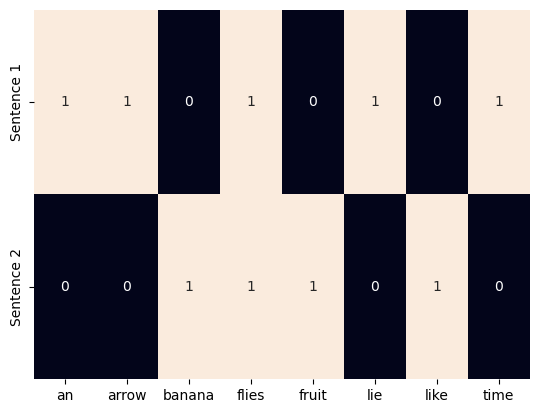

In [15]:
# TF (Term Frequency)

from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ["Time flies lie an arrow.", "Fruit flies like a banana."]

one_hot_vectorizer = CountVectorizer(binary = True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names_out() # method declaration has been changed from get_feature_names() 
sns.heatmap(one_hot, annot=True, cbar=False,
            xticklabels=vocab, 
            yticklabels = ["Sentence 1", "Sentence 2"])



<Axes: >

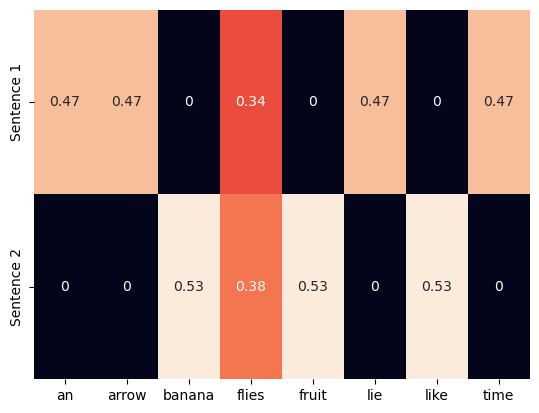

In [16]:
# TF - IDF

from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab, yticklabels= ["Sentence 1", "Sentence 2"])

## Basic of PyTorch

### Generate Tensor

In [24]:
# helper function to describe Tensor

def describe(x):
  print("Type : {}".format(x.type()))
  print("Size : {}".format(x.shape))
  print("Value \n{}".format(x))
  print("\n")

In [25]:
import torch

# Random init
describe(torch.Tensor(2,3))

# initialize from uniform distribution or standard normal distribution
describe(torch.rand(2,3)) # uniform distribution
describe(torch.randn(2,3)) # standard normal distribution

Type : torch.FloatTensor
Size : torch.Size([2, 3])
Value 
tensor([[0., 0., 0.],
        [0., 0., 0.]])


Type : torch.FloatTensor
Size : torch.Size([2, 3])
Value 
tensor([[0.6073, 0.4973, 0.3629],
        [0.1205, 0.9591, 0.6963]])


Type : torch.FloatTensor
Size : torch.Size([2, 3])
Value 
tensor([[-0.4376, -0.8057,  0.4015],
        [ 0.0627,  0.9801, -2.1447]])




In [26]:
# initialize with specific scalar

x_zeros = torch.zeros(2,3) # fill with zero
x_ones = torch.ones(2,3)
x_filled = x_ones.fill_(5)

describe(x_zeros)
describe(x_ones)
describe(x_filled)

Type : torch.FloatTensor
Size : torch.Size([2, 3])
Value 
tensor([[0., 0., 0.],
        [0., 0., 0.]])


Type : torch.FloatTensor
Size : torch.Size([2, 3])
Value 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


Type : torch.FloatTensor
Size : torch.Size([2, 3])
Value 
tensor([[5., 5., 5.],
        [5., 5., 5.]])




In [27]:
# make Tensor using python list

x = torch.Tensor([[1,2,3],
                  [4,5,6]])
describe(x)

# make Tensor using numpy array
import numpy as np

npy = np.random.rand(2,3)
x = torch.from_numpy(npy)
describe(x)

Type : torch.FloatTensor
Size : torch.Size([2, 3])
Value 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


Type : torch.DoubleTensor
Size : torch.Size([2, 3])
Value 
tensor([[0.5059, 0.6002, 0.2974],
        [0.9462, 0.1197, 0.9513]], dtype=torch.float64)




In [28]:
# using torch.Tensor, basic tensor type is torch.FloatTensor
# Type Casting : float, long, double

x = torch.FloatTensor([[1,2,3], [4,5,6]])
describe(x)

# long tensor
x_long = x.long()
describe(x_long)

# using dtype
x = torch.tensor([[1,2,3], [4,5,6]], dtype=torch.int64)
describe(x)

# make it flot tensfor
x_float = x.float()
describe(x_float)

Type : torch.FloatTensor
Size : torch.Size([2, 3])
Value 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


Type : torch.LongTensor
Size : torch.Size([2, 3])
Value 
tensor([[1, 2, 3],
        [4, 5, 6]])


Type : torch.LongTensor
Size : torch.Size([2, 3])
Value 
tensor([[1, 2, 3],
        [4, 5, 6]])


Type : torch.FloatTensor
Size : torch.Size([2, 3])
Value 
tensor([[1., 2., 3.],
        [4., 5., 6.]])




### Tenor Math-Operation

In [31]:
# add

x = torch.randn(2,3)
describe(x)
describe(torch.add(x,x))
describe(x + x)


Type : torch.FloatTensor
Size : torch.Size([2, 3])
Value 
tensor([[ 1.0176,  0.2334, -0.1892],
        [ 0.1365, -0.1302, -0.2565]])


Type : torch.FloatTensor
Size : torch.Size([2, 3])
Value 
tensor([[ 2.0352,  0.4668, -0.3784],
        [ 0.2730, -0.2605, -0.5131]])


Type : torch.FloatTensor
Size : torch.Size([2, 3])
Value 
tensor([[ 2.0352,  0.4668, -0.3784],
        [ 0.2730, -0.2605, -0.5131]])




In [35]:
# Tensor math operation rely on Dimenson

x = torch.arange(6)
describe(x)

# generate tensor sharing same data (pointer)
x = x.view(2,3)
describe(x)

describe(torch.sum(x, dim=0))
describe(torch.sum(x, dim=1))
describe(torch.transpose(x, 0, 1))

Type : torch.LongTensor
Size : torch.Size([6])
Value 
tensor([0, 1, 2, 3, 4, 5])


Type : torch.LongTensor
Size : torch.Size([2, 3])
Value 
tensor([[0, 1, 2],
        [3, 4, 5]])


Type : torch.LongTensor
Size : torch.Size([3])
Value 
tensor([3, 5, 7])


Type : torch.LongTensor
Size : torch.Size([2])
Value 
tensor([ 3, 12])


Type : torch.LongTensor
Size : torch.Size([3, 2])
Value 
tensor([[0, 3],
        [1, 4],
        [2, 5]])




### Indexing, Slicing, Concat

In [41]:
# indexing

x = torch.arange(6).view(2,3)
describe(x)
describe(x[:1, :2])
describe(x[0,1])

# indices always have to be LongTensor
indices = torch.LongTensor([0,2])
describe(torch.index_select(x, dim=1, index=indices))

indices = torch.LongTensor([0, 0])
describe(torch.index_select(x, dim=0, index=indices))

row_indicies = torch.arange(2).long()
col_indicies = torch.LongTensor([0, 1])
describe(x[row_indicies, col_indicies])

Type : torch.LongTensor
Size : torch.Size([2, 3])
Value 
tensor([[0, 1, 2],
        [3, 4, 5]])


Type : torch.LongTensor
Size : torch.Size([1, 2])
Value 
tensor([[0, 1]])


Type : torch.LongTensor
Size : torch.Size([])
Value 
1


Type : torch.LongTensor
Size : torch.Size([2, 2])
Value 
tensor([[0, 2],
        [3, 5]])


Type : torch.LongTensor
Size : torch.Size([2, 3])
Value 
tensor([[0, 1, 2],
        [0, 1, 2]])


Type : torch.LongTensor
Size : torch.Size([2])
Value 
tensor([0, 4])




In [51]:
# Concat

x = torch.arange(6, dtype=torch.float).view(2,3)
describe(x)

# using cat method
describe(torch.cat([x,x], dim=0))
describe(torch.cat([x,x], dim=1))

# using stack
describe(torch.stack([x, x]))


Type : torch.FloatTensor
Size : torch.Size([2, 3])
Value 
tensor([[0., 1., 2.],
        [3., 4., 5.]])


Type : torch.FloatTensor
Size : torch.Size([4, 3])
Value 
tensor([[0., 1., 2.],
        [3., 4., 5.],
        [0., 1., 2.],
        [3., 4., 5.]])


Type : torch.FloatTensor
Size : torch.Size([2, 6])
Value 
tensor([[0., 1., 2., 0., 1., 2.],
        [3., 4., 5., 3., 4., 5.]])


Type : torch.FloatTensor
Size : torch.Size([2, 2, 3])
Value 
tensor([[[0., 1., 2.],
         [3., 4., 5.]],

        [[0., 1., 2.],
         [3., 4., 5.]]])




In [58]:
# matrix multiplication
x1 = torch.arange(6, dtype=torch.float).view(2,3)
describe(x1)

x2 = torch.ones(3,2)
x2[:,1] += 1
describe(x2)

describe(torch.mm(x1, x2))

Type : torch.FloatTensor
Size : torch.Size([2, 3])
Value 
tensor([[0., 1., 2.],
        [3., 4., 5.]])


Type : torch.FloatTensor
Size : torch.Size([3, 2])
Value 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


Type : torch.FloatTensor
Size : torch.Size([2, 2])
Value 
tensor([[ 3.,  6.],
        [12., 24.]])




### Tensor and Calculation Graph

In [61]:
# using requires_grad to record loss function and gradient

x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)

y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

z = y.mean()
describe(z)
#Using Backward, it calculates Back propagation
z.backward()
print(x.grad is None)

Type : torch.FloatTensor
Size : torch.Size([2, 2])
Value 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


True
Type : torch.FloatTensor
Size : torch.Size([2, 2])
Value 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)


True
Type : torch.FloatTensor
Size : torch.Size([])
Value 
21.0


False


## CUDA Tensor

In [67]:
device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')
print(device)

x = torch.rand(3,3).to(device)
describe(x)

mps:0
Type : torch.mps.FloatTensor
Size : torch.Size([3, 3])


/opt/homebrew/anaconda3/envs/NLP/lib/python3.8/site-packages/torch/_tensor_str.py:137: UserWarning: MPS: nonzero op is supported natively starting from macOS 13.0. Falling back on CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1695391828857/work/aten/src/ATen/native/mps/operations/Indexing.mm:283.)
  nonzero_finite_vals = torch.masked_select(


Value 
tensor([[0.0234, 0.1825, 0.7494],
        [0.9650, 0.4083, 0.9163],
        [0.0560, 0.4266, 0.7730]], device='mps:0')




In [68]:
y = torch.rand(3,3)
x + y

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, mps:0 and cpu!

In [69]:
cpu_device = torch.device("cpu")
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y

tensor([[0.7107, 0.2351, 1.2380],
        [1.5625, 0.5897, 1.1399],
        [0.6699, 1.2387, 1.2431]])

## Practice

1. 2D텐서를 만들고 차원 0 위치에 크기가 1인 차원을 추가하라
2. 이전 텐서에 추가한 차원을 삭제하라
3. 범위가 [3,7) 이고 크기가 5x3인 랜덤한 텐서를 만들어라
4. 정규분포 (평균=0, 표준편차=1)를 사용해 텐서를 만드세요
5. 텐서 torch.Tensor([1, 1, 1, 0, 1])애서 0이 아닌 원소의 인덱스를 추출하라
6. 크기가 (3,1)인 랜덤한 텐서를 만들고 네벌을 복사해서 쌓으세요
7. 2차원 행렬 두개 (a = torch.rand(3,4,5), b=torch.rand(3,5,4)의 배치 행렬 곱셈을 계산하세요)
8. 3차원 행렬 (a = torch.rand(3,4,5))과 2차원 행렬 (b=torch.rand(5,4))의 배치행렬 곱셈을 계산하세요.

In [104]:
## Practice

# 1. 2D텐서를 만들고 차원 0 위치에 크기가 1인 차원을 추가하라

a = torch.rand(3,3)
describe(a)
a = a.unsqueeze(0)
describe(a)

# 2. 이전 텐서에 추가한 차원을 삭제하라
a = a.squeeze(0)
describe(a)

# 3. 범위가 [3,7) 이고 크기가 5x3인 랜덤한 텐서를 만들어라
a = torch.rand(5,3) * (7-3)
describe(a)

# 4. 정규분포 (평균=0, 표준편차=1)를 사용해 텐서를 만드세요
a = torch.randn(3,3)
a

# 5. 텐서 torch.Tensor([1, 1, 1, 0, 1])애서 0이 아닌 원소의 인덱스를 추출하라
a = torch.Tensor([1, 1, 1, 0, 1])
torch.nonzero(a)


# 6. 크기가 (3,1)인 랜덤한 텐서를 만들고 네벌을 복사해서 쌓으세요
a = torch.rand(3,1)
a.expand(3,4)


# 7. 2차원 행렬 두개 (a = torch.rand(3,4,5), b=torch.rand(3,5,4)의 배치 행렬 곱셈을 계산하세요)
a = torch.rand(3,4,5)
b = torch.rand(3,5,4)
describe(torch.bmm(a,b))

# 8. 3차원 행렬 (a = torch.rand(3,4,5))과 2차원 행렬 (b=torch.rand(5,4))의 배치행렬 곱셈을 계산하세요.
a = torch.rand(3,4,5)
b = torch.rand(5,4)
describe(torch.matmul(a,b))
describe(torch.bmm(a, b.unsqueeze(0).expand(a.size(0), *b.size())))
# another answer


Type : torch.FloatTensor
Size : torch.Size([3, 3])
Value 
tensor([[0.4099, 0.8327, 0.7973],
        [0.8859, 0.8038, 0.1975],
        [0.8307, 0.7639, 0.1702]])


Type : torch.FloatTensor
Size : torch.Size([1, 3, 3])
Value 
tensor([[[0.4099, 0.8327, 0.7973],
         [0.8859, 0.8038, 0.1975],
         [0.8307, 0.7639, 0.1702]]])


Type : torch.FloatTensor
Size : torch.Size([3, 3])
Value 
tensor([[0.4099, 0.8327, 0.7973],
        [0.8859, 0.8038, 0.1975],
        [0.8307, 0.7639, 0.1702]])


Type : torch.FloatTensor
Size : torch.Size([5, 3])
Value 
tensor([[0.1447, 0.2240, 1.2910],
        [0.4882, 3.9826, 0.5545],
        [1.4856, 2.6221, 1.0149],
        [3.4996, 3.8944, 3.7463],
        [3.9136, 0.3644, 0.3682]])


Type : torch.FloatTensor
Size : torch.Size([3, 4, 4])
Value 
tensor([[[1.2363, 1.3642, 1.0448, 1.0094],
         [1.8283, 2.5456, 1.7343, 2.1502],
         [1.4918, 2.2790, 1.2388, 1.6831],
         [1.0580, 1.5105, 0.8825, 1.1060]],

        [[1.7520, 2.1603, 1.8356, 1.96